In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy  as np
import pandas as pd
import keras
from keras import models, layers

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
(train_image, train_labels), (test_image, test_labels) = mnist.load_data()

In [4]:
print(train_image.shape)
print(train_labels.shape)
print(test_image.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
true_class=np.argmax(test_image,1)
true_class

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 20, 20,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  9,  9,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

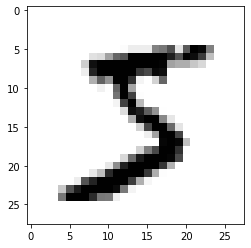

In [6]:
plt.imshow(train_image[0],cmap=plt.cm.binary)
plt.show()

In [7]:
print(train_image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
X_train = train_image.reshape((60000,28,28,1))
X_test = test_image.reshape((10000,28,28,1))

In [9]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [10]:
X_train.shape

(60000, 28, 28, 1)

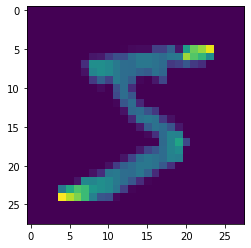

In [11]:
plt.imshow(X_train[0])
plt.show()

In [12]:
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [13]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
inputs = layers.Input((28,28,1))
net = layers.Conv2D(32, (3, 3), padding ='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)

net = layers.Conv2D(64, (3, 3))(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)


net = layers.Conv2D(64, (3, 3))(net)
net = layers.Activation('relu')(net)


In [15]:

# Apply global average pooling to get flat feature vectors
x = layers.GlobalAveragePooling2D()(net)

# Add a dense classifier on top
x= layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

In [16]:
model = keras.Model(inputs=inputs, outputs=outputs)


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0     

In [18]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])


In [19]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 64,validation_split = 0.2)

Epoch 1/10
750/750 [==============================] - 28s 36ms/step - loss: 1.3081 - accuracy: 0.5457 - val_loss: 0.2272 - val_accuracy: 0.9330
Epoch 2/10
750/750 [==============================] - 28s 38ms/step - loss: 0.2385 - accuracy: 0.9261 - val_loss: 0.1269 - val_accuracy: 0.9625
Epoch 3/10
750/750 [==============================] - 19s 26ms/step - loss: 0.1341 - accuracy: 0.9578 - val_loss: 0.0748 - val_accuracy: 0.9791
Epoch 4/10
750/750 [==============================] - 22s 30ms/step - loss: 0.0929 - accuracy: 0.9709 - val_loss: 0.0809 - val_accuracy: 0.9762
Epoch 5/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0744 - accuracy: 0.9764 - val_loss: 0.0784 - val_accuracy: 0.9759
Epoch 6/10
750/750 [==============================] - 20s 26ms/step - loss: 0.0540 - accuracy: 0.9826 - val_loss: 0.0497 - val_accuracy: 0.9847
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0488 - accuracy: 0.9841 - val_loss: 0.0477 - val_accuracy:

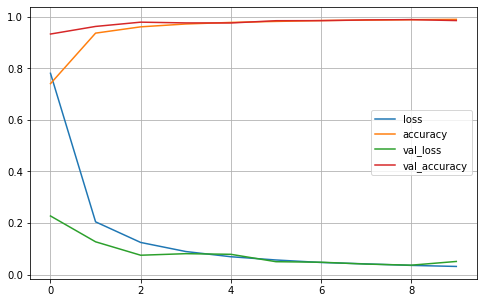

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid('True')
plt.show()

In [21]:
# test
model.evaluate (X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0413 - accuracy: 0.9854


[0.041275542229413986, 0.9854000210762024]

In [22]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
np.argmax(y_pred)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
Y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)

In [31]:
confusion_matrix(
    Y_test.argmax(axis=1), Y_test.argmax(axis=1))

array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]])

In [30]:
confusion_matrix(
    Y_test.argmax(axis=1), pred.argmax(axis=1))

array([[ 976,    0,    0,    0,    0,    0,    1,    1,    0,    2],
       [   4, 1119,    6,    0,    1,    0,    2,    1,    2,    0],
       [   3,    0, 1024,    0,    0,    0,    0,    2,    3,    0],
       [   0,    0,    5,  983,    0,    7,    0,    2,   10,    3],
       [   0,    0,    0,    0,  967,    0,    0,    0,    4,   11],
       [   2,    0,    0,    3,    1,  870,    4,    0,    8,    4],
       [   4,    0,    2,    0,    1,    1,  946,    0,    3,    1],
       [   0,    3,    8,    1,    6,    0,    0, 1000,    2,    8],
       [   1,    0,    1,    0,    1,    1,    0,    0,  968,    2],
       [   0,    0,    0,    0,    3,    0,    0,    1,    4, 1001]])

In [32]:
# it is little bit good
model.save('Mnist_model.h5')